<a href="https://colab.research.google.com/github/SaintJeane/Movie_Recommendation_System/blob/main/Collaborative_Filtering_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A Simple Movie Recommender System using Collaborative Filtering**🎥📽🎬

##**Introduction**
This notebook is about developing a movie recommendation system using a Collaborative Filtering algorithm. The model will be able to recommend movies based on the ratings or likability of the user and other users.

##**Dataset**
The data used in this project is retrieved from the `MovieLens Datasets`. The MovieLens dataset is a stable benchmark dataset that contains 25 million movie ratings and one million tag applications applied to 62,000 movies by 162,000 users. The dataset is available in a zip folder containing six CSV files:
* `genome-scores.csv`
* `genome-tags.csv`
* `links.csv`
* `movies.csv`
* `ratings.csv`
* `tags.csv`

For our model, we will primarily use the `movies.csv` and `ratings.csv` files.

##**Approach**
We will use Collaborative Filtering, a popular technique in recommendation systems. Collaborative Filtering makes automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). It leverages the similarities between users and items to provide personalized recommendations. In this case we'll utilize TensorFlow to implement collaborative filtering for a movie recommendation system.

**Libraries Used in the model:**
1. `tensorflow.keras.layers`: This library provides functions to create various types of layers in a neural network, such as input layers, embedding layers, dense layers, etc. Based on our model breaking them down:

   * `tensorflow.keras.layers.Input`: This library provides the functionality to create an input layer for a neural network model. It represents the input data that will be fed into the model during training or inference.
   * `tensorflow.keras.layers.Dot`: This library provides the functionality to perform element-wise dot product operations between two tensors. It is often used in collaborative filtering or attention mechanisms.
   * `tensorflow.keras.layers.Reshape`: This library provides the functionality to reshape the dimensions of a tensor. It allows for changing the shape of the input tensor without changing its data.
   * `tensorflow.keras.layers.Dense`: This library provides the functionality to create a fully connected layer in a neural network model. It represents a layer where each neuron is connected to every neuron in the previous layer.
   * `tensorflow.keras.layers.Add`: This library provides the functionality to perform element-wise addition operations between two tensors. It is often used in skip connections or residual networks.
   * `tensorflow.keras.layers.Activation`: This library provides the functionality to apply an activation function to the output of a layer in a neural network model. It introduces non-linearity to the model and helps in learning complex patterns.
   * `tensorflow.keras.layers.Lambda`: This library provides the functionality to create a custom layer in a neural network model. It allows for defining and applying custom operations on the input data.
   * `tensorflow.keras.layers.Embedding`: This library provides the functionality to create an embedding layer in a neural network model. It is commonly used for representing categorical or discrete variables as dense vectors of fixed size.
2. `tensorflow.keras.models`: This library allows us to define and compile neural network models.
3. `tensorflow.keras.optimizer`s: This library provides various optimization algorithms, such as Adam, SGD, etc., for training neural networks.
4. `tensorflow.keras.regularizers`: This library provides functions to apply regularization techniques, such as L1 and L2 regularization, to neural network weights.
5. `tensorflow.keras.utils`: This library provides utilities, such as plot_model, for working with Keras models.

- We use **embedding layers** in TensorFlow to represent users and movies as dense vectors in a lower-dimensional space. Embeddings capture the latent features of users and movies, allowing the model to learn their relationships and make accurate recommendations.
- We perform a **dot product** operation between the reshaped movie and user embeddings. The dot product measures the similarity between the embeddings and helps in determining the relevance of movies to users.
- Incorporating **bias information** into the recommendation process by adding **bias embeddings** for movies and users. These bias embeddings capture additional factors that can influence the recommendations.
- We also apply the **sigmoid activation** function to the merged result in the model setup with bias and to scale the output to the desired rating range. This step introduces non-linearity and ensures that the recommendations fall within the specified rating range.
- We then compile the model using the mean squared error loss function and the **Adam optimizer**. The mean squared error loss measures the difference between the predicted ratings and the actual ratings, while the Adam optimizer updates the model's parameters to minimize the loss.
- **Model summary**: printing a summary of the model's architecture, providing information about the layers, shapes, and number of parameters in the model.

Now before testing the model we frist need to develop functions that are used in a recommendation system to map movie IDs to their titles or unique IDs for easier identification and processing. And then we develop the `movie_recommend` function takes a movie ID, a set of weights (representing movie embeddings), and an optional parameter n to generate movie recommendations based on similarity. The function essentially uses the provided weights to calculate the similarity between the given movie and other movies, then retrieves and prints the top recommended movies based on this similarity. The function relies on helper functions such as `movieId_to_title`, `movieId_to_unique_movieId`, and `unique_movieId_to_title` to map between movie IDs and titles, as well as between movie IDs and unique movie IDs.

During testing some `movieIds` may return `"Movie ID Not Found!"` because during feature engineering we only used the movies that had ratings greater than 5,000 so as to proivde the recommendation to the user only popular movies and also to increase the speed of the prediction and operation of the model.

For the **visualisation of the embeddings** of the movies the following libraries are used:

1. `IPython.core.interactiveshell`: This library allows us to set the behavior of the IPython shell, such as the display of output.
2.  The **t-distributed stochastic neighbor embedding**, `TSNE` from `sklearn.manifold`: The `TSNE` (t-distributed stochastic neighbor embedding) is a dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space, typically two dimensions. In this case we visualise the movie embeddings, while sorting them by genre using t-SNE dimension reduction technique.

The techniques used here have been inspired and adapted from [here](#https://github.com/harpreetvirkk).


##**Getting the Workspace Ready**

In [ ]:
#Installing tensroflow into the notebook environment
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
%pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.7 MB/s eta 0:00:00


###_*(Optional) if you don't want to directly download the zip folder manually from the `MovieLens` website*_


In [ ]:
!wget 'https://files.grouplens.org/datasets/movielens/ml-25m.zip'

import os
import zipfile

# Specify the path to the downloaded ZIP file
local_zip = 'drive/MyDrive/movies_dataset/ml-25m.zip'

# Create a ZipFile object
zip_ref = zipfile.ZipFile(local_zip, 'r')

# Extract all files to the current working directory
zip_ref.extractall('.')

# Close the ZipFile
zip_ref.close()

print("Extraction completed successfully!")

In [ ]:
# Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from IPython.core.interactiveshell import InteractiveShell

from tensorflow.keras.layers import Input, Dot, Reshape, Dense, Add, Activation, Lambda, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model

from keras.callbacks import ModelCheckpoint

%matplotlib inline
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


##**Getting Data Ready**
Loading the csv files needed for our recommendation model system.

In [ ]:
rating_df = pd.read_csv("drive/MyDrive/movies_dataset/ml-25m/ratings.csv").loc[:,["userId","movieId","rating"]]
rating_df.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 572.2 MB


In [ ]:
movie_df = pd.read_csv("drive/MyDrive/movies_dataset/ml-25m/movies.csv")
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


##**Accessing the Data**

In [ ]:
#Checking if there are missing values in the loaded datasets
rating_df.isna().sum()


userId     0
movieId    0
rating     0
dtype: int64

In [ ]:
movie_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

Meaning there's no missing data on both of the datasets, we proceed with the next steps

In [ ]:
n_users = len(rating_df.userId.unique())
n_movies = len(rating_df.movieId.unique())
print("No of unique users:", n_users)
print("No of unique movies: ", n_movies, "\n")

No of unique users: 162541
No of unique movies:  59047 



In [ ]:
rating_count = rating_df[['movieId','rating']].groupby(['movieId']).count()
rating_count

,rating
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714
...,...
209157,1
209159,1
209163,1


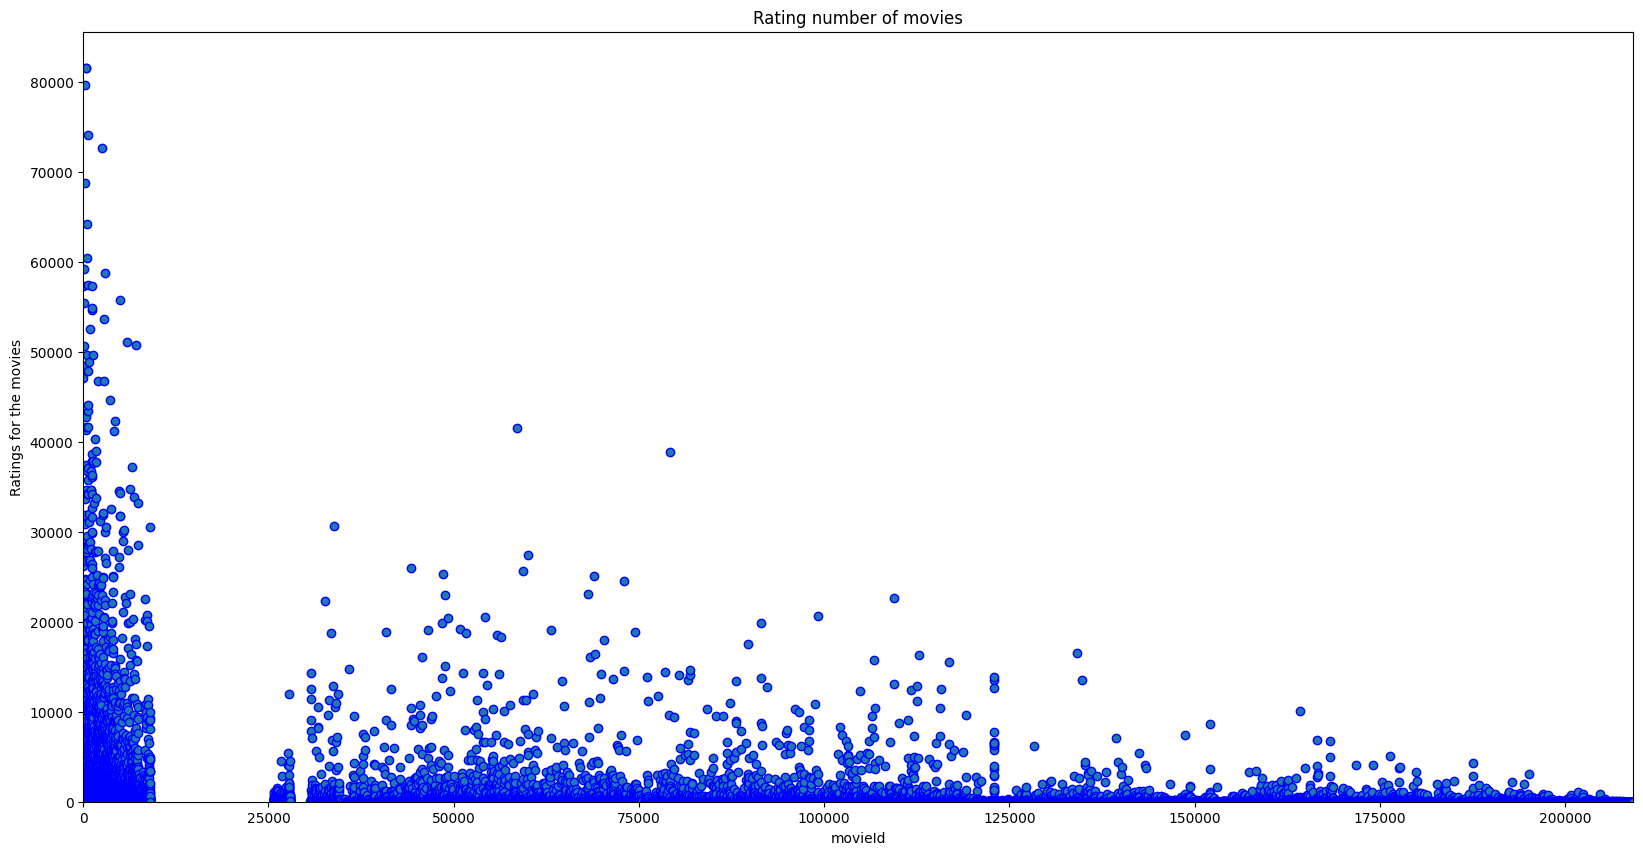

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(rating_count.index, rating_count.rating, edgecolor = 'blue')
plt.xlim(0, rating_count.index.max())
plt.ylim(0,)
plt.title('Rating number of movies')
plt.xlabel('movieId')
plt.ylabel('Ratings for the movies')
plt.show()

_Therefore we'll be using only the movies that have recieved more than 5,000 ratings. So as to provide recommendations to popular movies._

In [ ]:
top_movies = rating_df[rating_df.groupby('movieId')['rating'].transform('size')>3000]
top_movies

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
4,1,899,3.5
5,1,1088,4.0
...,...,...,...
25000088,162541,41566,4.0
25000089,162541,45517,4.5
25000090,162541,50872,4.5
25000093,162541,58559,4.0


In [ ]:
# Merging ratings and movies databases to get a single dataframe
data = pd.merge(movie_df,top_movies)
data

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
...,...,...,...,...,...
18729068,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,162271,3.0
18729069,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,162307,5.0
18729070,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,162335,5.0
18729071,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,162366,5.0


_Observing the new dataset features_

In [ ]:
n_users = len(data.userId.unique())
n_movies = len(data.movieId.unique())
min_rating = min(data['rating'])
max_rating = max(data['rating'])
print("No of unique users:", n_users)
print("No of unique movies: ", n_movies)
print("Minimum Rating: ", min_rating)
print("Maximum Rating:", max_rating)

No of unique users: 162529
No of unique movies:  1830
Minimum Rating:  0.5
Maximum Rating: 5.0


_Observing the frequency of the rating value in the new dataset ranging from 0.5 - 5_

Text(0.5, 0, 'Ratings')

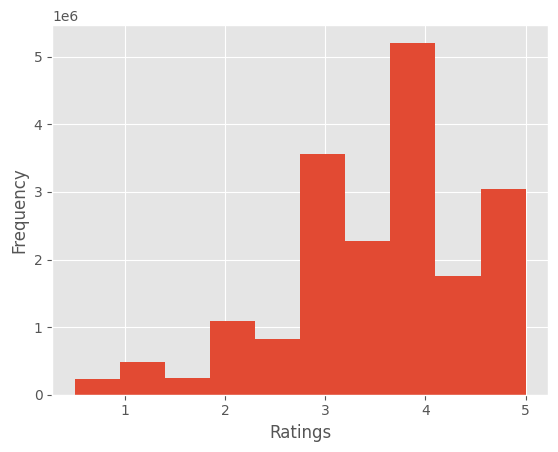

In [ ]:
# Plotting a histogram
plt.style.use('ggplot')
data['rating'].plot(kind='hist', bins = 10)
plt.xlabel('Ratings')

_Observing that the userIds and the movieIds are not continuous in the dataset, hence using Scikit-Learn's LabelEncoder to assign unique sequential IDs starting at zero._

In [ ]:
LE_user = LabelEncoder()
LE_movie = LabelEncoder()
# LE_genres = LabelEncoder()
data['UniqueUserId'] = LE_user.fit_transform(data['userId'].values)
data['UniqueMovieId'] = LE_movie.fit_transform(data['movieId'].values)
# data['genres_encoded'] = LE_genres.fit_transform(data['genres'])
data

,movieId,title,genres,userId,rating,UniqueUserId,UniqueMovieId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,2,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,3,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,4,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,7,0
...,...,...,...,...,...,...,...
18729068,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,162271,3.0,162258,1829
18729069,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,162307,5.0,162294,1829
18729070,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,162335,5.0,162322,1829
18729071,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,162366,5.0,162353,1829


##**Creating Our Own Validation Set**
We will now create our ( [userId, movieId] , rating) pairing of data and label that will be input into our model for training. We will not be using a testing or a validation dataset, as our end objective is not to make accurate predictions on new data, but learn the best entitiy embeddings.

In [ ]:
X = data[['UniqueUserId', 'UniqueMovieId']].values
y = data['rating'].values
X_array = [X[:,0], X[:, 1]]
print('Input (X_combined):', X_array, '\n')
print('Output (Rating): ', y, '\n')

Input (X_combined): [array([     1,      2,      3, ..., 162322, 162353, 162503]), array([   0,    0,    0, ..., 1829, 1829, 1829])] 

Output (Rating):  [3.5 4.  3.  ... 5.  5.  3.5] 



##**Building the model**

In [ ]:
def Movie_Embedding_Network(n_users, n_movies, embedding_size, min_rating, max_rating):

  #Input -> UserId followed by movieId
  users = Input(name = 'users', shape = (1,))
  movies = Input(name = 'movies', shape = (1,))

  #Create Embedding Layers
  users_embedding = Embedding(name = 'users_embeddings', input_dim = n_users, output_dim = embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=l2(0.000001))(users)
  movies_embedding = Embedding(name = 'movies_embeddings', input_dim = n_movies, output_dim = embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=l2(0.000001))(movies)

  #Reshaping the Embedding Layers
  reshaped_users_embedding = Reshape((embedding_size,), name = 'reshaped_users_embeddings')(users_embedding)
  reshaped_movies_embedding = Reshape((embedding_size,), name = 'reshaped_movies_embeddings')(movies_embedding)

  #Taking the dot product of the two embedding layers
  merged = Dot(name = 'dot_product', normalize = True, axes = 1)([reshaped_movies_embedding, reshaped_users_embedding])

  #Creating Embedding layers of size (1) for calculating bias.
  movies_bias = Embedding(name = 'movies_bias', input_dim = n_movies, output_dim = 1, embeddings_initializer='he_normal', embeddings_regularizer=l2(0.000001))(movies)
  users_bias = Embedding(name = 'users_bias', input_dim = n_users, output_dim = 1, embeddings_initializer='he_normal', embeddings_regularizer=l2(0.000001))(users)

  #Reshaping the Bias Embedding Layers
  reshaped_movies_bias = Reshape((1,), name = 'reshaped_movies_bias')(movies_bias)
  reshaped_users_bias = Reshape((1,), name = 'reshaped_users_bias')(users_bias)

  #Adding the Bias Layers to our dot product merged layer
  merged_w_bias = Add(name = 'bias_addition')([merged, reshaped_movies_bias, reshaped_users_bias])

  # Running the output of our dot product layer through a sigmoid activation layer and then scaling the outputs to our rating range for non-linearity
  activated = Activation('sigmoid')(merged_w_bias)
  scaled = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(activated)

  model = Model(inputs=[users, movies], outputs=scaled)
  model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
  return model

embedding_size = 50
model = Movie_Embedding_Network(n_users, n_movies, embedding_size, min_rating, max_rating)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 movies (InputLayer)         [(None, 1)]                  0         []                            
                                                                                                  
 users (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 movies_embeddings (Embeddi  (None, 1, 50)                91500     ['movies[0][0]']              
 ng)                                                                                              
                                                                                                  
 users_embeddings (Embeddin  (None, 1, 50)                8126450   ['users[0][0]']           

_Visualising processes form one layer to the next taking place in the model_

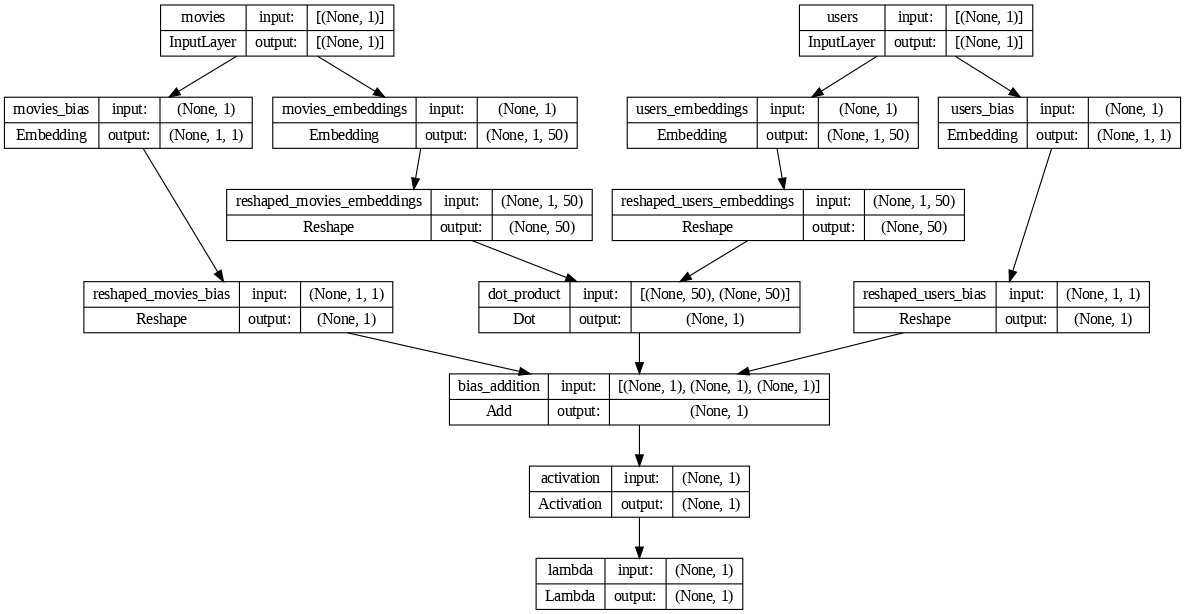

In [ ]:
# Plot the model diagram
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', dpi=80)

##**Training the Model**

###Creating Callbacks
_Using keras Model Checkpoint for saving the best models to minimize the loss._

In [ ]:
# Load the tensorboard notebook extension
%load_ext tensorboard

In [ ]:
filepath ='drive/MyDrive/movies_dataset/best_attempt.keras'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only = True, mode = 'min')
callbacks_list = [checkpoint]

_fit the model to the data_

In [ ]:
epochs = 15
history = model.fit(x=X_array, y=y, epochs=epochs, batch_size=1000, verbose=1, callbacks=callbacks_list)

Epoch 1/15
18722/18730 [============================>.] - ETA: 0s - loss: 0.7559
Epoch 1: loss improved from inf to 0.75589, saving model to drive/MyDrive/movies_dataset/best_attempt.keras
18730/18730 [==============================] - 127s 6ms/step - loss: 0.7559
Epoch 2/15
18726/18730 [============================>.] - ETA: 0s - loss: 0.6735
Epoch 2: loss improved from 0.75589 to 0.67354, saving model to drive/MyDrive/movies_dataset/best_attempt.keras
18730/18730 [==============================] - 113s 6ms/step - loss: 0.6735
Epoch 3/15
18727/18730 [============================>.] - ETA: 0s - loss: 0.6659
Epoch 3: loss improved from 0.67354 to 0.66586, saving model to drive/MyDrive/movies_dataset/best_attempt.keras
18730/18730 [==============================] - 113s 6ms/step - loss: 0.6659
Epoch 4/15
18729/18730 [============================>.] - ETA: 0s - loss: 0.6627
Epoch 4: loss improved from 0.66586 to 0.66268, saving model to drive/MyDrive/movies_dataset/best_attempt.keras
1873

In [ ]:
# Loading Best Weights
model.load_weights('drive/MyDrive/movies_dataset/best_attempt.keras')

In [ ]:
# Saving the best model
model.save('drive/MyDrive/movies_dataset/best_attempt.keras')

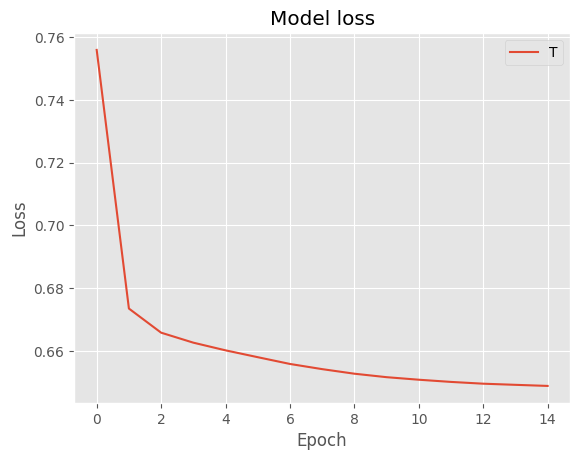

In [ ]:
# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend('Training Loss', loc='upper right')
plt.show()

##**Testing the Model**

First let's create functions that enable the mapping of movie IDs to titles and vice versa, as well as the mapping between movie IDs and unique movie IDs within the dataset.

In [ ]:
data_np = data.to_numpy()

# Function to map movie ID to its title
def movieId_to_title(id):
  for row in data_np:
    if row[0] == id:
      return row[1]
  return None

# Function to map unique movie ID to its title
def unique_movieId_to_title(uid):
  for row in data_np:
    if row[6] == uid:
      return row[1]
  return None

# Function to map movie ID to unique movie ID
def movieId_to_unique_movieId(id):
  for row in data_np:
    if row[0] == id:
      return int(row[6])
  return None

# Function to map unique movie ID to movie ID
def unique_movieId_to_movieId(uid):
  for row in data_np:
    if row[6] == uid:
      return row[0]
  return None

In [ ]:
#Inspecting and analysing the weights of the embedding layer in the model
movie_layer = model.get_layer('movies_embeddings')
movie_weights = movie_layer.get_weights()[0]
print(movie_weights.shape)
print(movie_weights[0])

(1830, 50)
[ 0.23735493 -0.10524526 -0.01696638  0.05695091 -0.00534664  0.01784465
  0.0803134  -0.2581651  -0.02909783  0.00226776  0.03842279  0.01602452
  0.01997655 -0.02414496 -0.01654917 -0.20093024 -0.09958484 -0.01430456
  0.03338592 -0.0275564   0.01741883  0.07445574 -0.00918426 -0.01307395
 -0.07836867 -0.56481826 -0.655979   -0.03672817 -0.6399045   0.10850678
 -0.02016111 -0.07061338  0.03024012  0.01768631 -0.00835215  0.03386055
 -0.00989903 -0.02569945 -0.00632414 -0.01066276  0.03457456 -0.03218642
  0.35141617 -0.10220997 -0.03228486  0.64202464 -0.02267875 -0.19073138
 -0.43415788 -0.14371507]


In [ ]:
#Normalising the weights of the embedding layer associated with the movies
movie_weights_normalized = movie_weights/np.linalg.norm(movie_weights, axis=1, keepdims=True)
print(movie_weights_normalized[0])
np.sum(np.square(movie_weights_normalized[0]))

[ 0.16042727 -0.07113487 -0.01146751  0.0384929  -0.00361377  0.01206113
  0.05428351 -0.17449278 -0.01966711  0.00153277  0.02596981  0.01083091
  0.01350207 -0.01631949 -0.01118552 -0.13580796 -0.06730901 -0.00966839
  0.02256541 -0.01862527  0.01177332  0.05032434 -0.0062076  -0.00883663
 -0.05296908 -0.38175845 -0.44337362 -0.02482443 -0.43250895  0.07333931
 -0.01362682 -0.04772731  0.02043918  0.01195411 -0.00564519  0.02288622
 -0.00669071 -0.01737016 -0.00427446 -0.00720692  0.02336881 -0.02175467
  0.23752081 -0.06908332 -0.02182121  0.43394196 -0.01532848 -0.1289146
 -0.29344562 -0.09713645]


1.0

In [ ]:
# Movie recommend function
def movie_recommend(movieId, weights, n=10):
  # Get the movie title from movie ID
  title = movieId_to_title(movieId)
  if not title:
      print("Movie ID not found!")
      return

  print('Printing recommendations for:', title, '\n\n')

  # Get the unique movie ID from the movie ID
  uid = movieId_to_unique_movieId(movieId)
  if uid is None:
      print("Unique Movie ID not found!")
      return

  # Calculate similarity using dot product
  # similarity = np.dot(weights, weights[uid].reshape(-1, 1)).flatten()
  similarity = np.dot(weights, weights[uid])

  # Sort similarities and get the closest movies
  sorted_sim = np.argsort(similarity)
  closest = sorted_sim[-n-1:-1]

  # Print top n recommendation
  count = 0
  for i in reversed(closest):
      count += 1
      # print(f'{count:{2}}: {unique_movieId_to_title(i):80} ---> Similarity: {similarity[i]:.2}')
      movie_title = unique_movieId_to_title(i)
      if movie_title:
        print(f'{count:{2}}: {movie_title:80}  Similarity: {similarity[i]:.2f}')
      else:
        print(f'{count:{2}}: Movie ID {i:80} Similarity: {similarity[i]:.2f}')

In [ ]:
#An instance of a movie recommending
movie_recommend(5, movie_weights_normalized);

Printing recommendations for: Father of the Bride Part II (1995) 


 1: Father of the Bride (1991)                                                        Similarity: 0.90
 2: Nine Months (1995)                                                                Similarity: 0.89
 3: Santa Clause, The (1994)                                                          Similarity: 0.89
 4: Three Men and a Baby (1987)                                                       Similarity: 0.87
 5: Mrs. Doubtfire (1993)                                                             Similarity: 0.86
 6: Grumpier Old Men (1995)                                                           Similarity: 0.85
 7: Kindergarten Cop (1990)                                                           Similarity: 0.84
 8: Angels in the Outfield (1994)                                                     Similarity: 0.82
 9: Look Who's Talking (1989)                                                         Similarity: 0.81
10: Y

In [ ]:
movie_recommend(3000, movie_weights_normalized)

Printing recommendations for: Princess Mononoke (Mononoke-hime) (1997) 


 1: Nausicaä of the Valley of the Wind (Kaze no tani no Naushika) (1984)              Similarity: 0.93
 2: Laputa: Castle in the Sky (Tenkû no shiro Rapyuta) (1986)                         Similarity: 0.88
 3: Spirited Away (Sen to Chihiro no kamikakushi) (2001)                              Similarity: 0.88
 4: Howl's Moving Castle (Hauru no ugoku shiro) (2004)                                Similarity: 0.86
 5: My Neighbor Totoro (Tonari no Totoro) (1988)                                      Similarity: 0.86
 6: Ponyo (Gake no ue no Ponyo) (2008)                                                Similarity: 0.83
 7: Akira (1988)                                                                      Similarity: 0.83
 8: Ghost in the Shell (Kôkaku kidôtai) (1995)                                        Similarity: 0.82
 9: Grave of the Fireflies (Hotaru no haka) (1988)                                    Similarity: 0.81

In [ ]:
movie_recommend(4896, movie_weights_normalized);

Printing recommendations for: Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001) 


 1: Harry Potter and the Chamber of Secrets (2002)                                    Similarity: 0.99
 2: Harry Potter and the Goblet of Fire (2005)                                        Similarity: 0.97
 3: Harry Potter and the Half-Blood Prince (2009)                                     Similarity: 0.96
 4: Harry Potter and the Deathly Hallows: Part 1 (2010)                               Similarity: 0.96
 5: Harry Potter and the Prisoner of Azkaban (2004)                                   Similarity: 0.96
 6: Harry Potter and the Order of the Phoenix (2007)                                  Similarity: 0.96
 7: Harry Potter and the Deathly Hallows: Part 2 (2011)                               Similarity: 0.94
 8: Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)            Similarity: 0.77
 9: Chronicles of Narnia: Prince Caspian, The (2

In [ ]:
movie_recommend(18, movie_weights_normalized);

Printing recommendations for: Four Rooms (1995) 


 1: Boxing Helena (1993)                                                              Similarity: 0.79
 2: Fear and Loathing in Las Vegas (1998)                                             Similarity: 0.74
 3: Pink Floyd: The Wall (1982)                                                       Similarity: 0.74
 4: The Devil's Advocate (1997)                                                       Similarity: 0.72
 5: Event Horizon (1997)                                                              Similarity: 0.71
 6: Crow: City of Angels, The (1996)                                                  Similarity: 0.70
 7: Falling Down (1993)                                                               Similarity: 0.70
 8: Lock, Stock & Two Smoking Barrels (1998)                                          Similarity: 0.70
 9: What Dreams May Come (1998)                                                       Similarity: 0.69
10: Natural Born Kille

###**Multi-input movie recommendation model**

_Developing a movie recommendation prediction where the input is more than one and therefore recommendation is needed._

In [ ]:
def movie_recommend_multiInput(movieIds, weights, n=10):
    recs = []
    for movieId in movieIds:
        uid = movieId_to_unique_movieId(movieId)
        if uid is None:
            print(f"Movie ID {movieId} not found!")
            continue

        similarity = np.dot(weights, weights[uid])
        sorted_sim = np.argsort(similarity)
        closest = sorted_sim[-n-1:-1]

        for i in reversed(closest):
            recs.append({"Movie_Name": unique_movieId_to_title(i), "Similarity": similarity[i]})

    # Sort combined recommendations by similarity in descending order
    combined_recs_sorted = sorted(recs, key=lambda i: i['Similarity'], reverse=True)

    # Remove duplicate recommendations
    seen = set()
    unique_recs = []
    for rec in combined_recs_sorted:
        if rec["Movie_Name"] not in seen:
            unique_recs.append(rec)
            seen.add(rec["Movie_Name"])
            if len(unique_recs) == n:
                break

    # Print the top `n` recommendations
    for i, rec in enumerate(unique_recs, start=1):
        print(f"{i:{2}}: {rec['Movie_Name']} ---> Similarity: {rec['Similarity']:.2f}")

In [ ]:
# Determining the recommendation for 2 movie inputs wiht an nstance of movie ID not found
movie_recommend_multiInput([10,8756], movie_weights_normalized)

Movie ID 8756 not found!
 1: Tomorrow Never Dies (1997) ---> Similarity: 0.83
 2: World Is Not Enough, The (1999) ---> Similarity: 0.82
 3: For Your Eyes Only (1981) ---> Similarity: 0.80
 4: Spy Who Loved Me, The (1977) ---> Similarity: 0.75
 5: Mission: Impossible (1996) ---> Similarity: 0.73
 6: Licence to Kill (1989) ---> Similarity: 0.73
 7: Thunderball (1965) ---> Similarity: 0.68
 8: Die Another Day (2002) ---> Similarity: 0.68
 9: Clear and Present Danger (1994) ---> Similarity: 0.68
10: View to a Kill, A (1985) ---> Similarity: 0.67


In [ ]:
movie_recommend_multiInput([4896, 2000], movie_weights_normalized)

 1: Harry Potter and the Chamber of Secrets (2002) ---> Similarity: 0.99
 2: Harry Potter and the Goblet of Fire (2005) ---> Similarity: 0.97
 3: Harry Potter and the Half-Blood Prince (2009) ---> Similarity: 0.96
 4: Harry Potter and the Deathly Hallows: Part 1 (2010) ---> Similarity: 0.96
 5: Harry Potter and the Prisoner of Azkaban (2004) ---> Similarity: 0.96
 6: Harry Potter and the Order of the Phoenix (2007) ---> Similarity: 0.96
 7: Harry Potter and the Deathly Hallows: Part 2 (2011) ---> Similarity: 0.94
 8: Lethal Weapon 2 (1989) ---> Similarity: 0.89
 9: Die Hard (1988) ---> Similarity: 0.86
10: True Lies (1994) ---> Similarity: 0.83


In [ ]:
movie_recommend_multiInput([48, 245], movie_weights_normalized)

Movie ID 245 not found!
 1: Anastasia (1997) ---> Similarity: 0.87
 2: Little Mermaid, The (1989) ---> Similarity: 0.84
 3: Tarzan (1999) ---> Similarity: 0.83
 4: Homeward Bound: The Incredible Journey (1993) ---> Similarity: 0.83
 5: Hercules (1997) ---> Similarity: 0.83
 6: Hunchback of Notre Dame, The (1996) ---> Similarity: 0.82
 7: Mulan (1998) ---> Similarity: 0.81
 8: 101 Dalmatians (1996) ---> Similarity: 0.80
 9: Free Willy (1993) ---> Similarity: 0.79
10: Casper (1995) ---> Similarity: 0.77


In [ ]:
movie_recommend_multiInput([552, 2065, 2], movie_weights_normalized)

 1: Bullets Over Broadway (1994) ---> Similarity: 0.85
 2: Casper (1995) ---> Similarity: 0.81
 3: Punch-Drunk Love (2002) ---> Similarity: 0.81
 4: Flubber (1997) ---> Similarity: 0.79
 5: Fantastic Mr. Fox (2009) ---> Similarity: 0.78
 6: Twister (1996) ---> Similarity: 0.77
 7: Dragonheart (1996) ---> Similarity: 0.77
 8: Maverick (1994) ---> Similarity: 0.76
 9: Down Periscope (1996) ---> Similarity: 0.76
10: Space Jam (1996) ---> Similarity: 0.75


##**Embeddings Visualisation of the Movies**

(1830, 2)


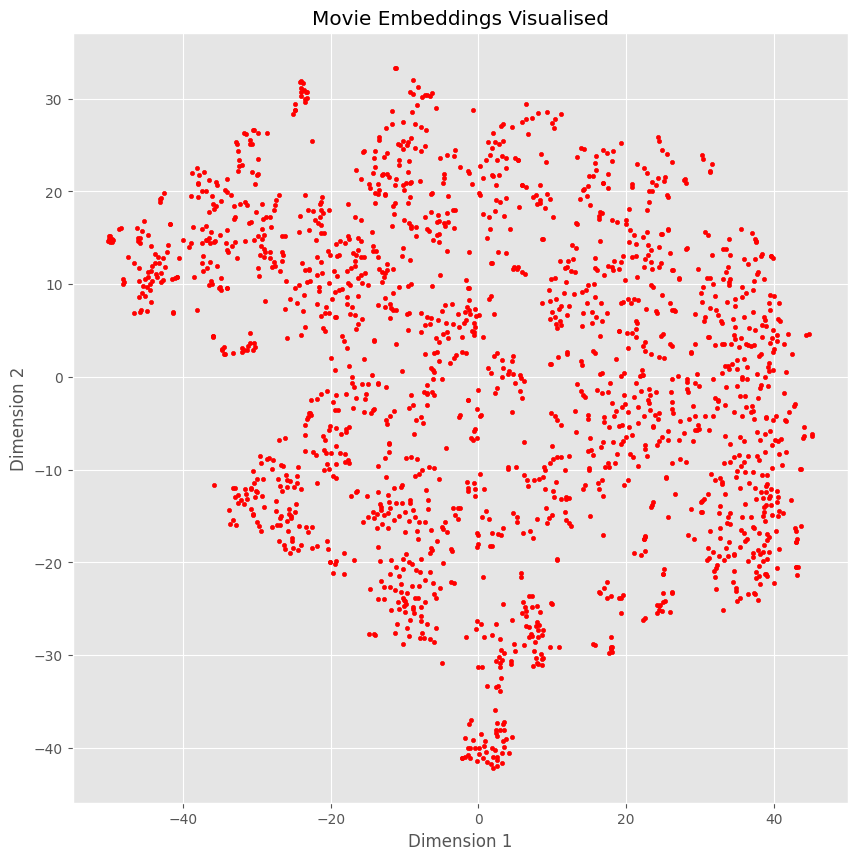

In [ ]:
InteractiveShell.ast_node_interactivity = 'all'

# Reduce dimensions of embeddings
def reduce_dim(weights, components):
    return TSNE(n_components=components, metric='cosine').fit_transform(weights)

movie_r = reduce_dim(movie_weights_normalized, components=2)
print(movie_r.shape)

# Plot the reduced dimensions
plt.figure(figsize=(10, 10))
plt.scatter(movie_r[:, 0], movie_r[:, 1], c='r', marker='.')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title("Movie Embeddings Visualised")
plt.show();


 The dataset is processed to extract and map movie genres, ensuring that each movie is associated with a specific genre based on a predefined set of genres. The resulting list contains the selected genres for each movie.

In [ ]:
import random
genres_list = data.loc[:,["UniqueMovieId","genres"]]
genres_list = genres_list.drop_duplicates()

print(genres_list)
genre_index = []

def get_gen(gens):
  gen_to_include = ['comedy', 'drama', 'action', 'romance', 'sci-fi', 'horror', 'children']
  for i in gens:
    if i in gen_to_include:
      return i
    else:
      return gens[0]
for i in genres_list.iloc:
  gens = i[1]
  gens = list(gens.split('|'))
  genre_index.append({i[0]: get_gen(gens).lower()})
  #print(genre_index[:10])
print(genre_index[-10:])

genres = []

for i in genre_index:
  # if list(i.values())[0] not in set(genres):
  g = list(i.values())
  genres.append(g[0])
# print(genres)

          UniqueMovieId                                       genres
0                     0  Adventure|Animation|Children|Comedy|Fantasy
57309                 1                   Adventure|Children|Fantasy
81537                 2                               Comedy|Romance
93341                 3                                       Comedy
105055                4                        Action|Crime|Thriller
...                 ...                                          ...
18710903           1825                                  Crime|Drama
18714613           1826                 Adventure|Animation|Children
18718432           1827              Action|Adventure|Fantasy|Sci-Fi
18721739           1828                         Action|Comedy|Sci-Fi
18725988           1829            Action|Adventure|Animation|Sci-Fi

[1830 rows x 2 columns]
[{1820: 'horror'}, {1821: 'action'}, {1822: 'action'}, {1823: 'action'}, {1824: 'sci-fi'}, {1825: 'crime'}, {1826: 'adventure'}, {1827: 'action'}, 

In [ ]:
from collections import Counter, OrderedDict
def count_items(l):
    counts = Counter(l)
    counts = sorted(counts.items(), key = lambda x: x[1], reverse = True)
    counts = OrderedDict(counts)
    return counts

# Remove genres not found
genre_counts = count_items(genres)
list(genre_counts.items())[:10]

[('action', 555),
 ('comedy', 439),
 ('drama', 351),
 ('adventure', 186),
 ('crime', 119),
 ('animation', 46),
 ('horror', 40),
 ('children', 35),
 ('thriller', 14),
 ('mystery', 12)]

_Plotting the movie embeddings with the 10 most popular genres._

1797


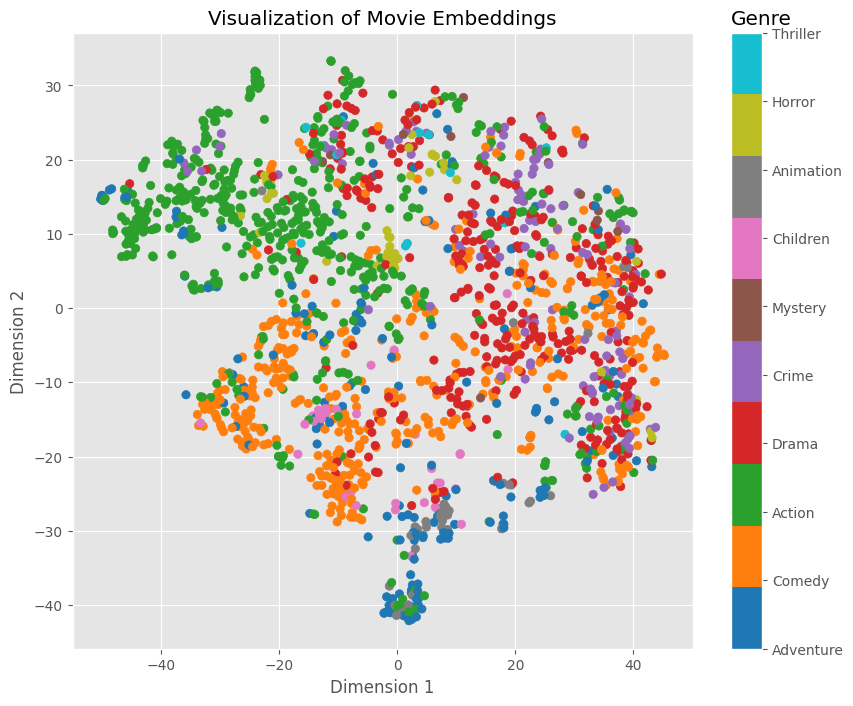

In [ ]:
# Include 10 most popular genres
genre_to_include = list(genre_counts.keys())[:10]

idx_include = []
genres = []

for i in genre_index:
    if list(i.values())[0] in genre_to_include:
            idx_include.append(int(list(i.keys())[0]))
            genres.append(list(i.values())[0].capitalize())

print(len(idx_include))

# Factorizing genres to convert them into integer labels
ints, gen = pd.factorize(genres)
gen[:5]

# Plotting
plt.figure(figsize = (10, 8))

sc = plt.scatter(movie_r[idx_include, 0], movie_r[idx_include, 1],
            c = ints, cmap = plt.cm.tab10)

cbar = plt.colorbar(sc)
cbar.set_ticks(np.arange(len(gen)))
cbar.set_ticklabels(gen)
cbar.ax.set_title('Genre', loc='left')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualization of Movie Embeddings')
plt.show();
# print(gen)
# for j, lab in enumerate(gen):
#     cbar.ax.text(1, (2 * j + 1) / ((2.3) ), lab, ha='left', va='center')
# cbar.ax.set_title('Genre', loc = 'left')

# plt.xlabel('1'); plt.ylabel('2'); plt.title('Visualization of MOVIE Embeddings');